# Introduction & Dataset Overview

# Imports

In [1]:
# 📌 Essential Libraries for Image Classification
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# 📌 TensorFlow & Keras for CNN Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory

# 📌 Sklearn for Performance Metrics
from sklearn.metrics import classification_report, confusion_matrix

# 📌 Suppress Warnings (optional)
import warnings
warnings.filterwarnings('ignore')

c:\Users\pmana\anaconda3\envs\hibiscus_cnn_model\lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.3)
  from scipy.stats import gaussian_kde


# GPU Check

In [2]:
print("Available GPU's:", tf.config.list_physical_devices('GPU'))
keras.backend.clear_session()

Available GPU's: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Dataset Verification

In [3]:
# Define dataset path (UPDATE with your actual dataset path)
dataset_path = "Hibiscus_Dataset"

# List all classes (subdirectories)
classes = sorted(os.listdir(dataset_path))

# Print the number of images per class
print("Dataset Overview:\n----------------")
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} images")
    else:
        print(f"Skipping {class_name} (not a directory)")

Dataset Overview:
----------------
Hibiscus_mutabilis: 1700 images
Hibiscus_rosa-sinensis: 1700 images
Hibiscus_sabdariffa: 1700 images


# Data Preprocessing

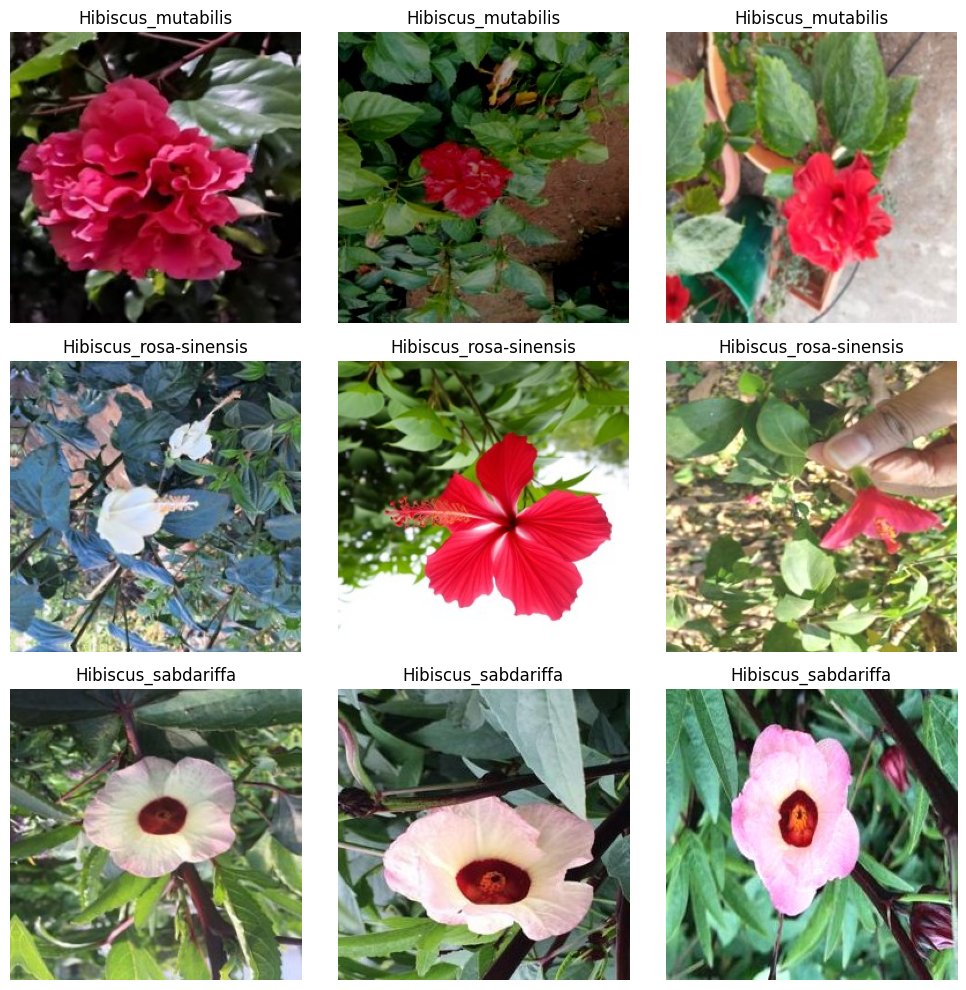

In [4]:
# Function to display sample images
def display_sample_images(dataset_path, classes, num_samples=3):
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(10, 10))
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        sample_images = random.sample(os.listdir(class_path), num_samples)  # Randomly select images
        
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)  # Open image
            
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(class_name)
    
    plt.tight_layout()
    plt.show()

# Call the function
display_sample_images(dataset_path, classes)

# Preprocessing the Data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (252, 252)  # Keep the original size
BATCH_SIZE = 32  # Number of images per batch

# Only rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Load Training Data (No Augmentation)
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Load Validation Data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 4080 images belonging to 3 classes.
Found 1020 images belonging to 3 classes.


# Visualize Preprocessed Images

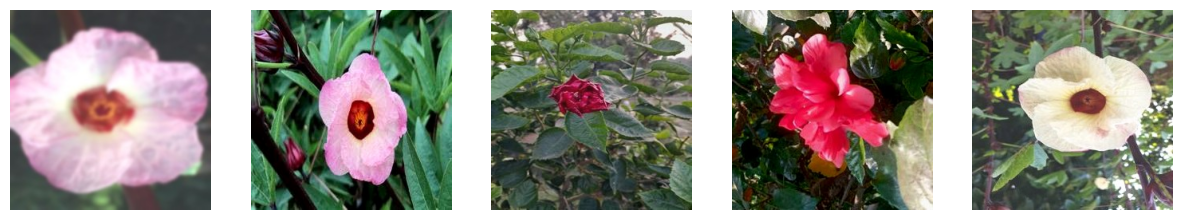

In [6]:
# Get a batch of images
sample_images, sample_labels = next(train_data)

# Display some augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(sample_images[i])
    axes[i].axis('off')

plt.show()

# CNN Architecture

In [17]:
# Define CNN model
model = Sequential([
    # First Conv Layer
    Conv2D(32, (3,3), activation='relu', input_shape=(252, 252, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5), 

    # Second Conv Layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    # Dropout Layer
    # Dropout(0.2),

    # Third Conv Layer
    # Conv2D(128, (3,3), activation='relu'),
    # MaxPooling2D(pool_size=(2,2)),

    # Flattening
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization

    # Output Layer
    Dense(3, activation='softmax')  # 3 classes -> Softmax activation
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 125, 125, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 123, 123, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 61, 61, 64)       

# Training the CNN Model

In [18]:
EPOCHS = 25  # Number of epochs

# Train the CNN model
history = model.fit(
    train_data,  
    validation_data=val_data,  
    epochs=EPOCHS,  # Adjust based on performance
    steps_per_epoch=len(train_data),  
    validation_steps=len(val_data)
)

# Final Training & Validation Accuracy and Loss
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")

Epoch 1/25
128/128 [==============================] - 63s 488ms/step - loss: 3.1468 - accuracy: 0.4544 - val_loss: 0.9969 - val_accuracy: 0.4686
Epoch 2/25
128/128 [==============================] - 65s 505ms/step - loss: 0.6579 - accuracy: 0.7233 - val_loss: 1.0293 - val_accuracy: 0.5461
Epoch 3/25
128/128 [==============================] - 65s 509ms/step - loss: 0.4888 - accuracy: 0.7924 - val_loss: 1.1355 - val_accuracy: 0.5029
Epoch 4/25
128/128 [==============================] - 65s 510ms/step - loss: 0.3762 - accuracy: 0.8422 - val_loss: 1.0485 - val_accuracy: 0.6167
Epoch 5/25
128/128 [==============================] - 65s 509ms/step - loss: 0.3005 - accuracy: 0.8804 - val_loss: 1.0565 - val_accuracy: 0.6373
Epoch 6/25
128/128 [==============================] - 66s 512ms/step - loss: 0.2436 - accuracy: 0.9012 - val_loss: 1.3168 - val_accuracy: 0.6588
Epoch 7/25
128/128 [==============================] - 65s 510ms/step - loss: 0.2220 - accuracy: 0.9157 - val_loss: 1.4801 - val_ac

# Model Evaluation

In [19]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(val_data)

print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

32/32 [==============================] - 2s 40ms/step - loss: 2.4763 - accuracy: 0.6647
Validation Accuracy: 0.6647
Validation Loss: 2.4763


# Graphs of Training & Validation Accuracy/Loss

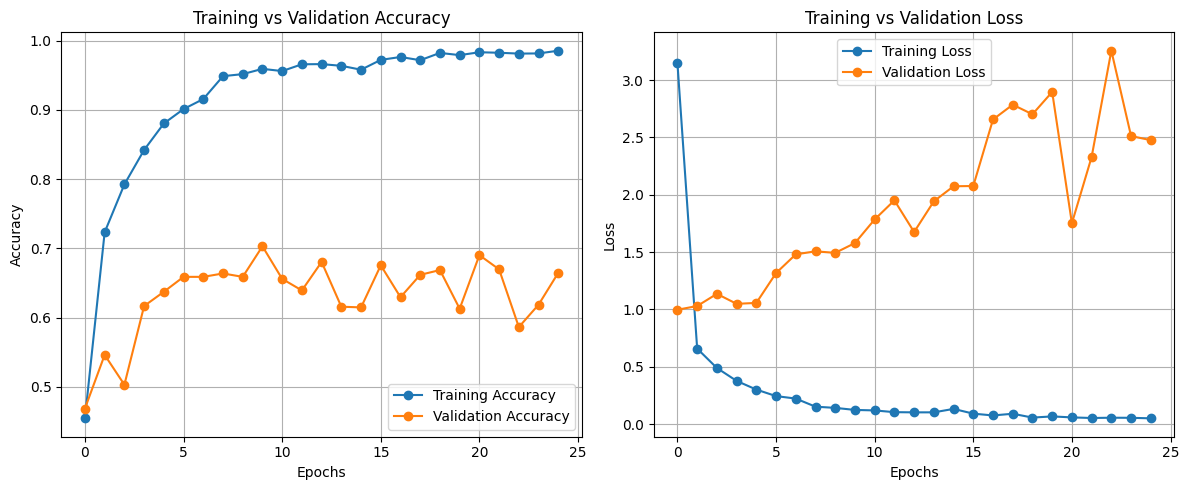

In [20]:
# Extract values from training history
epochs_range = range(len(history.history['accuracy']))
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
